<a href="https://colab.research.google.com/github/aminabeshr/cnn-model/blob/main/lstm_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [ ]:

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
!unzip 'UCI HAR Dataset.zip'


--2025-03-21 19:20:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘UCI HAR Dataset.zip’

UCI HAR Dataset.zip     [         <=>        ]  58.17M  32.3MB/s    in 1.8s    

2025-03-21 19:20:41 (32.3 MB/s) - ‘UCI HAR Dataset.zip’ saved [60999314]

Archive:  UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/UCI HAR Dataset/
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features.txt  
  inflating: UCI HAR Dataset/features_info.t

In [ ]:


X_train = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
y_train = pd.read_csv("UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)


X_test = pd.read_csv("UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
y_test = pd.read_csv("UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None)

print(" شكل بيانات X_train:", X_train.shape)
print(" شكل بيانات y_train:", y_train.shape)
print("\n أول 5 صفوف من X_train:")
print(X_train.head())
print("\n أول 5 قيم من y_train:")
print(y_train.head().values.flatten())

unique_labels = np.unique(y_train)
print(f"\n عدد الفئات الفريدة في البيانات: {len(unique_labels)}")
print(f" الفئات المتاحة: {unique_labels}")


<ipython-input-5-e2f7f143e7a2>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
<ipython-input-5-e2f7f143e7a2>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv("UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)
<ipython-input-5-e2f7f143e7a2>:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv("UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)


 شكل بيانات X_train: (7352, 561)
 شكل بيانات y_train: (7352, 1)

 أول 5 صفوف من X_train:
        0         1         2         3         4         5         6    \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

        7         8         9    ...       551       552       553       554  \
0 -0.983185 -0.923527 -0.934724  ... -0.074323 -0.298676 -0.710304 -0.112754   
1 -0.974914 -0.957686 -0.943068  ...  0.158075 -0.595051 -0.861499  0.053477   
2 -0.963668 -0.977469 -0.938692  ...  0.414503 -0.390748 -0.760104 -0.118559   
3 -0.982750 -0.989302 -0.938692  ...  0.404573 -0.117290 -0.482845 -0.036788   
4 -0.979672 -0.990441 -0.942469  ...  0.087753 -0.351471 -0.

<ipython-input-5-e2f7f143e7a2>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_test = pd.read_csv("UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None)


In [ ]:

def load_data():
    INPUT_PATH = 'UCI HAR Dataset/'
    features = np.loadtxt(INPUT_PATH + 'features.txt', dtype=str)[:, 1]


    X_train = np.loadtxt(INPUT_PATH + 'train/X_train.txt')
    y_train = np.loadtxt(INPUT_PATH + 'train/y_train.txt')


    X_test = np.loadtxt(INPUT_PATH + 'test/X_test.txt')
    y_test = np.loadtxt(INPUT_PATH + 'test/y_test.txt')

    return X_train, y_train, X_test, y_test, features

X_train, y_train, X_test, y_test, feature_names = load_data()

print(f"شكل بيانات التدريب: {X_train.shape}, عدد الفئات: {len(np.unique(y_train))}")


شكل بيانات التدريب: (7352, 561), عدد الفئات: 6


In [ ]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)


y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print(f"الشكل بعد المعالجة - X_train: {X_train.shape}, y_train: {y_train.shape}")


الشكل بعد المعالجة - X_train: (7352, 561, 1), y_train: (7352, 6)


In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, LSTM, Dense, Dropout

In [ ]:
model = Sequential([

    Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),


    Conv1D(filters=256, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),


    LSTM(128, return_sequences=True),
    Dropout(0.5),


    LSTM(64),
    Dropout(0.5),


    Dense(128, activation='relu'),
    Dropout(0.5),


    Dense(y_train.shape[1], activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 557, 128)            │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 557, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 278, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 276, 256)            │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 276, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 138, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 138, 128)            │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 138, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,486 (1.36 MB)

 Trainable params: 355,718 (1.36 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 141s 574ms/step - accuracy: 0.4065 - loss: 1.2589 - val_accuracy: 0.3821 - val_loss: 1.3523
Epoch 2/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 129s 562ms/step - accuracy: 0.6781 - loss: 0.6446 - val_accuracy: 0.5860 - val_loss: 0.9247
Epoch 3/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 138s 602ms/step - accuracy: 0.7744 - loss: 0.4624 - val_accuracy: 0.7699 - val_loss: 0.5930
Epoch 4/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 132s 559ms/step - accuracy: 0.8236 - loss: 0.3950 - val_accuracy: 0.8531 - val_loss: 0.3629
Epoch 5/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 152s 604ms/step - accuracy: 0.8721 - loss: 0.3202 - val_accuracy: 0.8307 - val_loss: 0.4316
Epoch 6/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 133s 565ms/step - accuracy: 0.8969 - loss: 0.2682 - val_accuracy: 0.8778 - val_loss: 0.3367
Epoch 7/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 151s 603ms/step - accuracy: 0.9065 - loss: 0.2524 - val_accuracy: 0.8728 - val_loss: 0.3509
Epoch 8/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 135s 571ms/step - accuracy: 0.9182 -

In [ ]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f"دقة النموذج على بيانات الاختبار: {accuracy * 100:.2f}%")


93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - accuracy: 0.8748 - loss: 0.3659
دقة النموذج على بيانات الاختبار: 89.01%


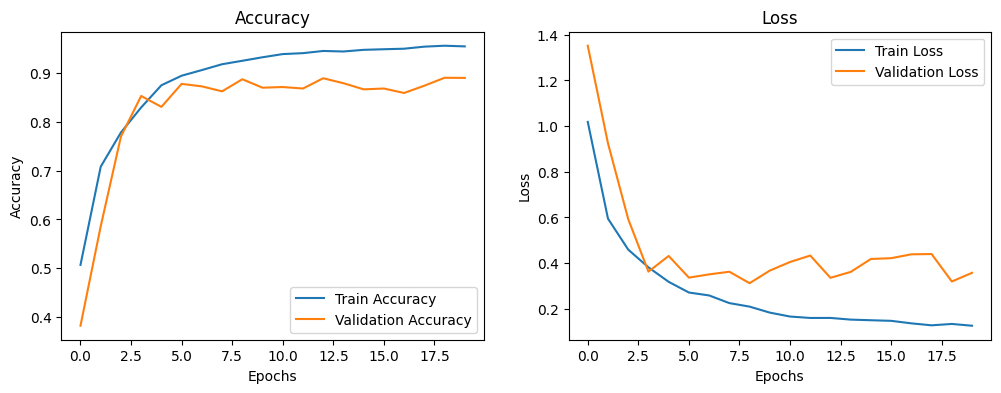

In [ ]:

plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:

sample_index = np.random.randint(0, X_test.shape[0])
sample = X_test[sample_index].reshape(1, X_test.shape[1], 1)
true_label = np.argmax(y_test[sample_index])


prediction = np.argmax(model.predict(sample))

print(f"التسمية الحقيقية: {true_label}, التسمية المتوقعة: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
التسمية الحقيقية: 3, التسمية المتوقعة: 3


In [ ]:
# حفظ النموذج
model.save("cnn_lstm_har_model.h5")
print("تم حفظ النموذج بنجاح!")


تم حفظ النموذج بنجاح!


In [ ]:
import numpy as np


sample_index = np.random.randint(0, X_test.shape[0])


sample = X_test[sample_index].reshape(1, X_test.shape[1], 1)
true_label = np.argmax(y_test[sample_index])


predicted_probabilities = model.predict(sample)
predicted_label = np.argmax(predicted_probabilities)


print("=" * 50)
print(f"التسمية الحقيقية: {true_label}")
print(f"التسمية المتوقعة: {predicted_label}")
print("=" * 50)


for i, prob in enumerate(predicted_probabilities[0]):
    print(f"🔹 فئة {i}: {prob:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
التسمية الحقيقية: 3
التسمية المتوقعة: 3
🔹 فئة 0: 0.0000
🔹 فئة 1: 0.0000
🔹 فئة 2: 0.0000
🔹 فئة 3: 0.9930
🔹 فئة 4: 0.0070
🔹 فئة 5: 0.0000
